# Assignment 7 (Week 7)

>**Note**: 

```
- Late submissions are penalized.
- Only GitHub submissions are acceptable.
```

## Name: Kehinde Bayode

<br>

## Please show and display ALL your calculations and results.
> Remember to read the **`instructions`** carefully.

In [3]:
# Built-in library
import itertools

# Standard imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Transformer and model imports

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

#import necessary libraries for data pre-processing

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.impute import SimpleImputer

#feature engineering

from feature_engine.encoding import (RareLabelEncoder)



# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 1_000






> The data can be found [here](https://drive.google.com/file/d/1_c3KA14xQC02K0QZ4cpi1emjdz0rqHzb/view?usp=share_link).

### Data Dictionary

```
- Age: continuous.

- Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

- Final_weight: continuous.

- Education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, - Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

- Education_num: continuous.

- Marital_status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, - Married-AF-spouse.

- Occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

- Relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

- Race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

- Genger: Female, Male.

- Capital_gain: continuous.

- Capital_loss: continuous.

- Hours_per_week: continuous.

- Country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

- Salary: 
```

### Objective

```
Predict whether a person makes over 50K a year.

```



###  Qs 1. Build a machine learning model that predicts the salary.

###  Qs 2. Evaluate the performance of your model using at least three (3) performance metrics.

<hr>

## Note: 

- The assignment **should** be submitted through a `public` GitHub repository.

## SOLUTION

### About Dataset

The problem aims to predict the  class of a persons's salary based on some variables or characteristics of the person.

This dataset has some variables such as age, sex, country which can be used for  predicting whether a person earns more than 50k or less.

![image](https://lifecore.ch/wp-content/uploads/2019/12/shutterstock_221542798-1-1536x1025.jpg)

## STEPS

###  1. Exploratory Data Analysis 

The first step in any ML problem is to explore, anayze and get the  summary statistics of the data. This will help in gainig insights and also in understanding the data.

In [68]:
#load csv data using pandas
salary_data=pd.read_csv("salary.csv")

In [5]:
#creating a function to explore the dataset

def eda(data: pd.DataFrame)-> pd.DataFrame or pd.Series:
    """This function reads a csv file and 
    gives the summary statisticts of a dataset
    
    Params: 
    data (Dataframe) : The data
    
    Returns
    data: Pd.Dataframe or pd.Series 
    """
    print(f"""
          ===dtypes===
          
          {data.dtypes}
          
          ===NaN Values===
          
          {data.isna().sum()}
          
          ====shape=====
          
          The dataset has {data.shape[0]} rows and {data.shape[1]} columns
          
          ===Unique Values in each feature===
          
          {data.nunique()}
          
          
          ====head====
          
          
          
          """)
    return data.head()
    
    


In [6]:
eda(salary_data)


          ===dtypes===
          
          Age                int64
Workclass         object
Final_weight       int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Country           object
Salary            object
dtype: object
          
          ===NaN Values===
          
          Age               0
Workclass         0
Final_weight      0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Country           0
Salary            0
dtype: int64
          
          ====shape=====
          
          The dataset has 32560 rows and 15 columns
          
          ===Unique Values in each feature===
          
          Age              

,Age,Workclass,Final_weight,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Country,Salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


From the above description of the data, it is seen that 

1. There are no missing values in the dataset

2. Looking at the uniques values, the features `Education` and `Education_num` has the same number of unique values and looking closely at some of the data in the two columns, they seem to represent the same information where one is numerical and the other is categorical.


In [7]:
salary_data[["Education", "Education_num"]].head(20)

,Education,Education_num
0,Bachelors,13
1,HS-grad,9
2,11th,7
3,Bachelors,13
4,Masters,14
5,9th,5
6,HS-grad,9
7,Masters,14
8,Bachelors,13
9,Some-college,10


It can be seen from above that the Bachelors,HS-grad, 11th, some college corresponds with their numerical equivalence of 13,9,7 respectively. This confirms that the two columns represent the same information and either of them can be dropped to remove redundancy in the dataset. The `Education` variable will be drooped

In [8]:
#Get the summary description of the data using .describe 
salary_data.describe()

,Age,Final_weight,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


The Summary statistics shows that the `Capital_gain` and the `Capital_loss` have 75th percentile value to be zero with a high standard deviation, which shows that the values are far apart from the mean(high variability). There is also a wide range of values for the age column, minimun is 17 and maximum is 90. There is need for further exploration on some features to have a better understanding and know if can be used for modelling.

In [9]:
salary_data["Capital_gain"].value_counts(normalize=True)
salary_data["Capital_loss"].value_counts(normalize=True)

Capital_loss
0       0.953348
1902    0.006204
1977    0.005160
1887    0.004883
1848    0.001566
1485    0.001566
2415    0.001505
1602    0.001443
1740    0.001290
1590    0.001229
1876    0.001198
1672    0.001044
1564    0.000768
2258    0.000768
2001    0.000737
1669    0.000737
1741    0.000737
1980    0.000706
1719    0.000676
2051    0.000645
2002    0.000645
1408    0.000645
1579    0.000614
2377    0.000614
1504    0.000553
1721    0.000553
1974    0.000553
2339    0.000522
2179    0.000461
1628    0.000461
1762    0.000430
2559    0.000369
625     0.000369
2444    0.000369
2824    0.000307
1617    0.000276
2042    0.000276
2205    0.000276
2392    0.000276
1651    0.000276
1594    0.000246
2174    0.000215
1380    0.000215
1340    0.000215
1092    0.000215
2206    0.000184
2057    0.000184
880     0.000184
1573    0.000184
2246    0.000184
2603    0.000154
213     0.000123
1825    0.000123
1668    0.000123
1258    0.000123
2547    0.000123
1726    0.000123
2129    0.000092
4

From the normalized value counts, the features (`Capital_gain` and `Capital_loss`)shows the same value for more than 90% of observations in the dataset.This can be regarded as a quasi constant feature and needs to be dropped as the model may not be able to find useful patterns from them.

### 2. Data pre-processing

It is the process of cleaning and transforming raw data into a format that can be easily understood and analyzed by machine learning algorithms. It is a crucial step in any data analysis or machine learning project. 

Data pre-processing improves the quality of the dataset by removing errors, filling in missing values, and addressing inconsistencies, allowing for more accurate results from data analysis and machine learning algorithms. Some of the steps involved in data pre-processing include data cleaning, feature selection, scaling, and normalization.

In [10]:
#splitting the data into categorical and numerical variables

#select categorical variables in the dataset
cat_var=list(salary_data.select_dtypes(include="O").columns)

#select numerical variables in the dataset
num_var=list(salary_data.select_dtypes(exclude="O").columns)




#### Use of boxplots for visualizing distribution of numerical data.

This will help in identifying variables with outliers.




In [11]:

def box_plots(
    *,
    data: pd.DataFrame,
    features: list,
    n_rows: int,
    n_cols: int,
    figsize: tuple = (15, 8),
) -> "Plot":
    """This returns a box plot of all the specified features."""
    fig, axs = plt.subplots(n_rows, n_cols, figsize=figsize)

    for idx, feat in enumerate(features):
        if n_rows > 1:
            ax = axs[(idx // n_cols), (idx % n_cols)]
        else:
            ax = axs[idx]

        sns.boxplot(data=data, x=feat, ax=ax)
        ax.set_title(f"Count Plot of {feat!r}")




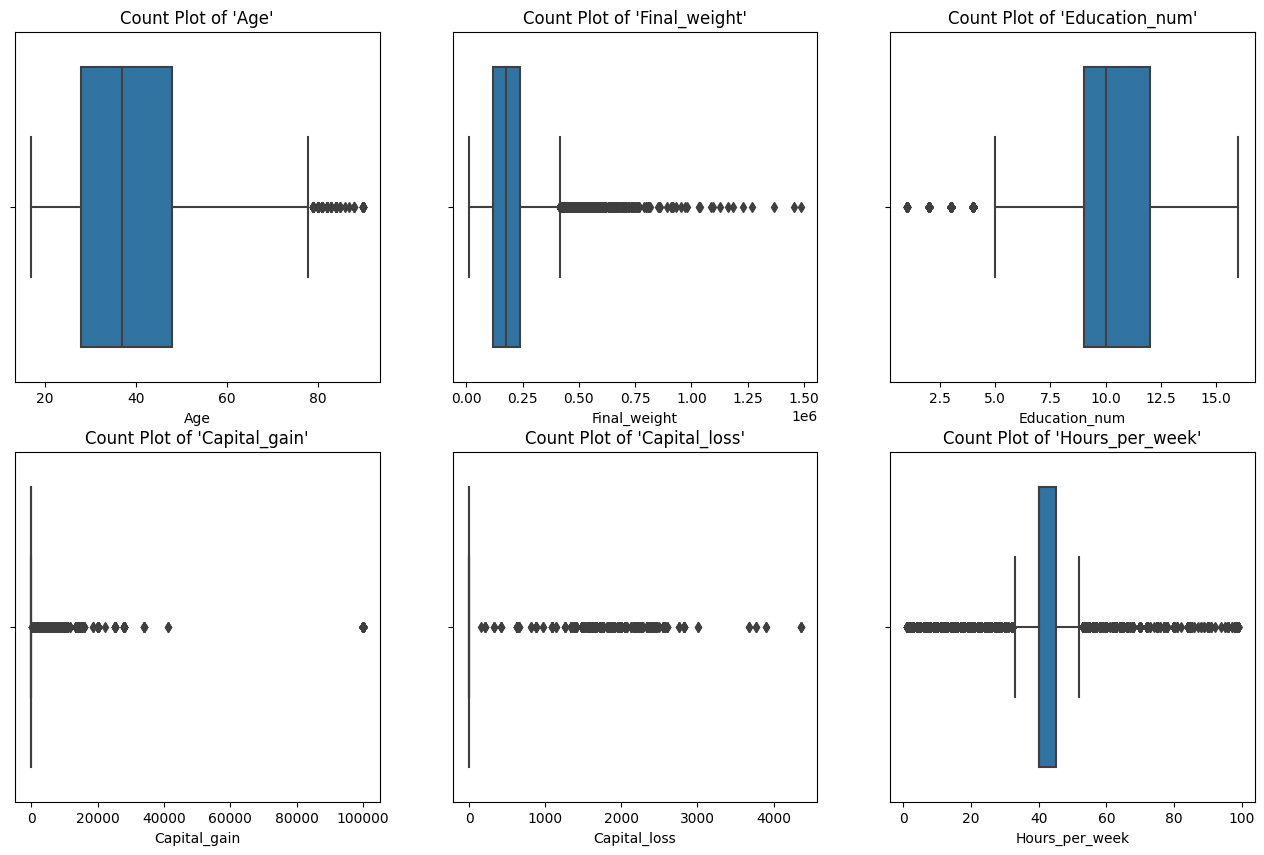

In [12]:
box_plots(data=salary_data, features=num_var, n_rows=2, n_cols=3,figsize=(16,10))

Almost all of the numerical variables have outliers in their dataset. The one with the more outliers Capital_gain and Capital_loss which has all values outside of the zero as outliers. These columns need to be dropped.

In [13]:
## Visualizing data 
def plot_counts(
    *,
    data: pd.DataFrame,
    features: list,
    n_rows: int,
    n_cols: int,
    figsize: tuple = (15, 8),
) -> "Plot":
    """This returns the count and hist plot of all the specified features."""
    fig, axs = plt.subplots(n_rows, n_cols, figsize=figsize)

    for idx, feat in enumerate(features):
        if n_rows > 1:
            ax = axs[(idx // n_cols), (idx % n_cols)]
        else:
            ax = axs[idx]
            
        if data[feat].nunique()>16:
            sns.histplot(data=data, x=feat, ax=ax)
            ax.set_title(f"Hist Plot of {feat!r}")
            
        else:
            

            sns.countplot(data=data, x=feat, ax=ax)
            ax.set_title(f"Count Plot of {feat!r}")
            # Annotate the chart
            for bar in ax.patches:
                x_val = bar.get_x() + bar.get_width() / 2  # x pos
                y_val = bar.get_height() # y pos
                ax.annotate(
                    text=y_val,  # text pos
                    xy=(x_val, y_val),  # (x, y)
                    xytext=(0, 6),  # text position
                    ha="center",  # horizontal alignment
                    va="center",  # vertical alignment
                    size=12,  # text size
                    textcoords="offset points",
                )
    

    fig.tight_layout()
    plt.show()

        
    

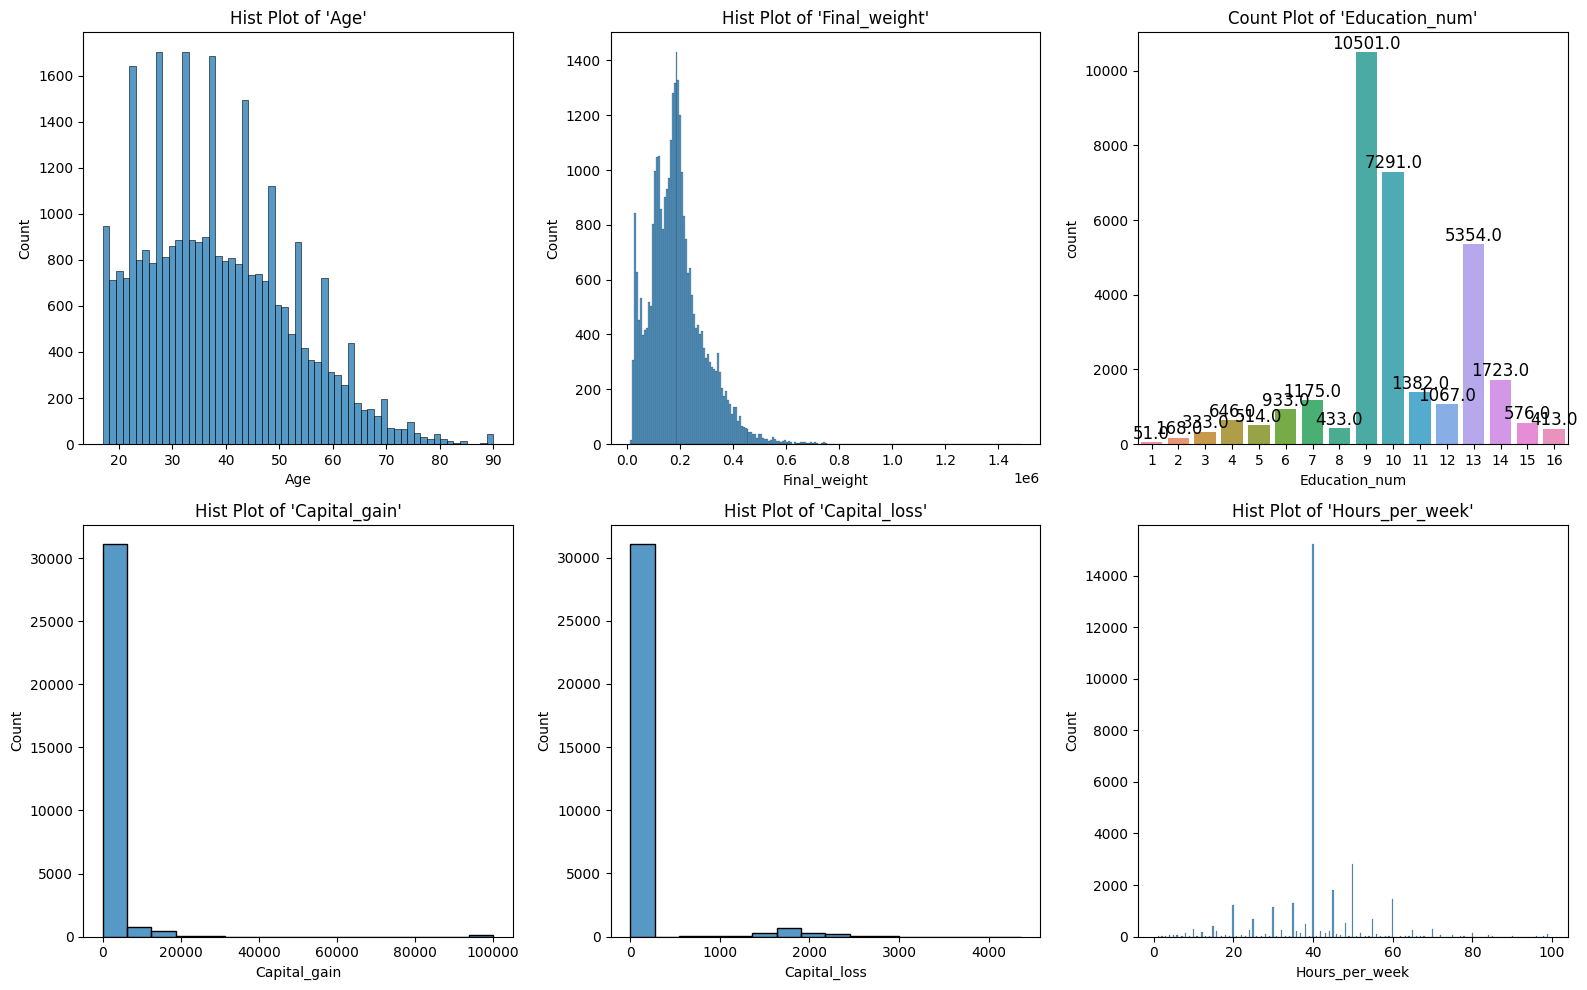

In [14]:

#plotting the count plots of numerical variables
plot_counts(data=salary_data, features=num_var, n_rows=2, n_cols=3,figsize=(16,10))

From the above visualizations of the numerical data, it is seen that the `Age`, `Final_Weight` Column are left skewed i.e Most of the data is distributed to the left. The `Hours_per_week` distribution looks scantily.


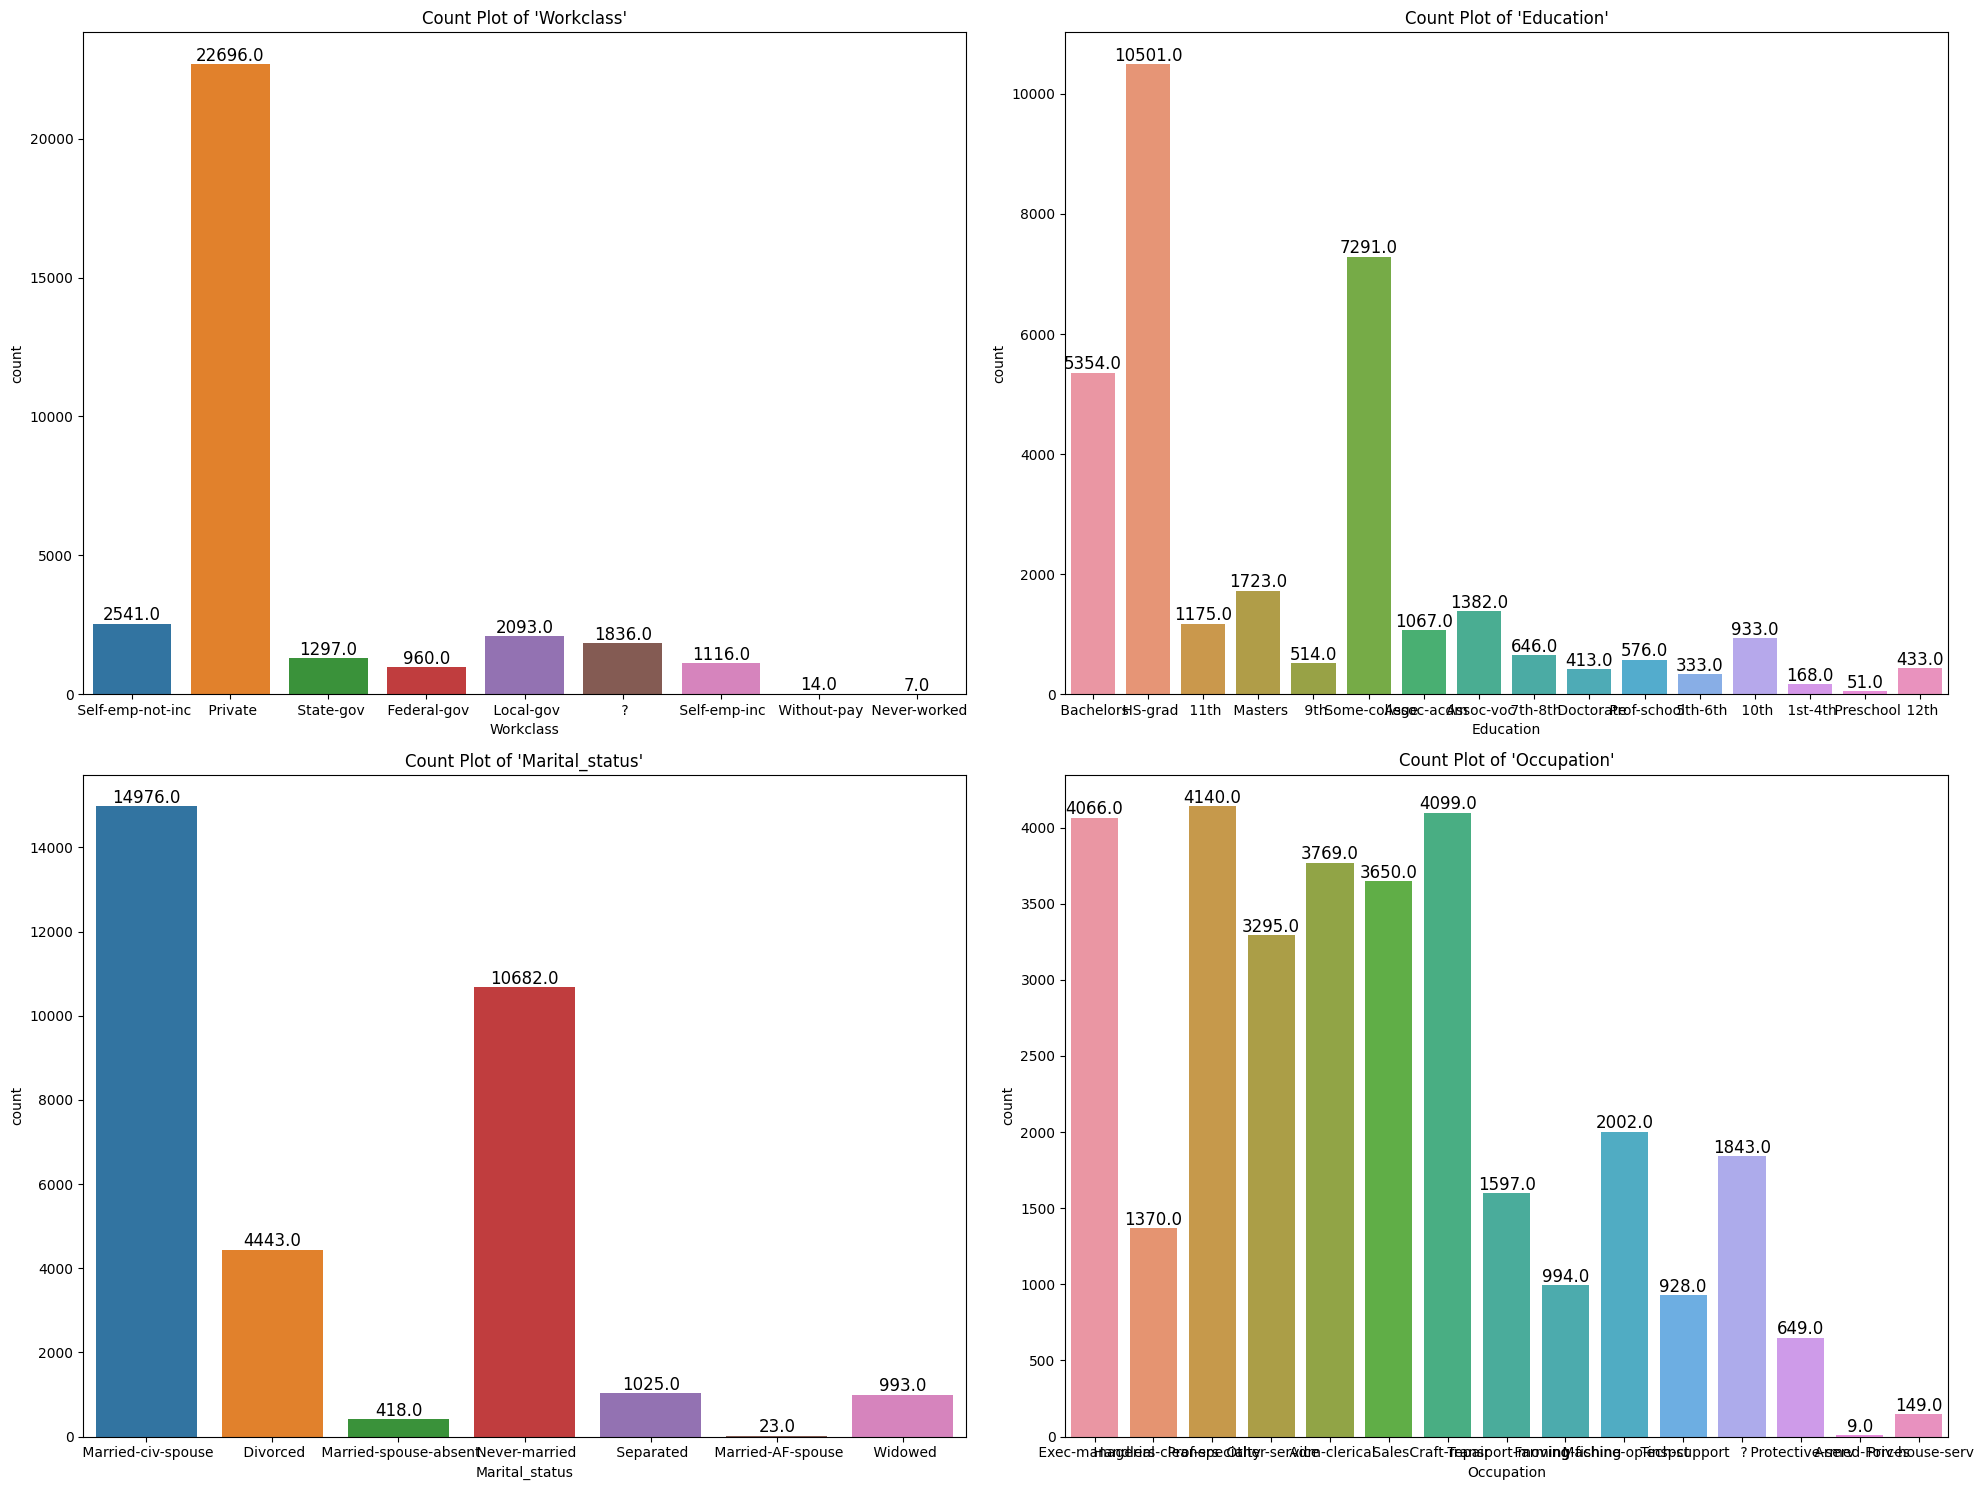

In [15]:

#visualizing the first four categorical features distribution
plot_counts(data=salary_data, features=cat_var[:4], n_rows=2, n_cols=2,figsize=(20,15))

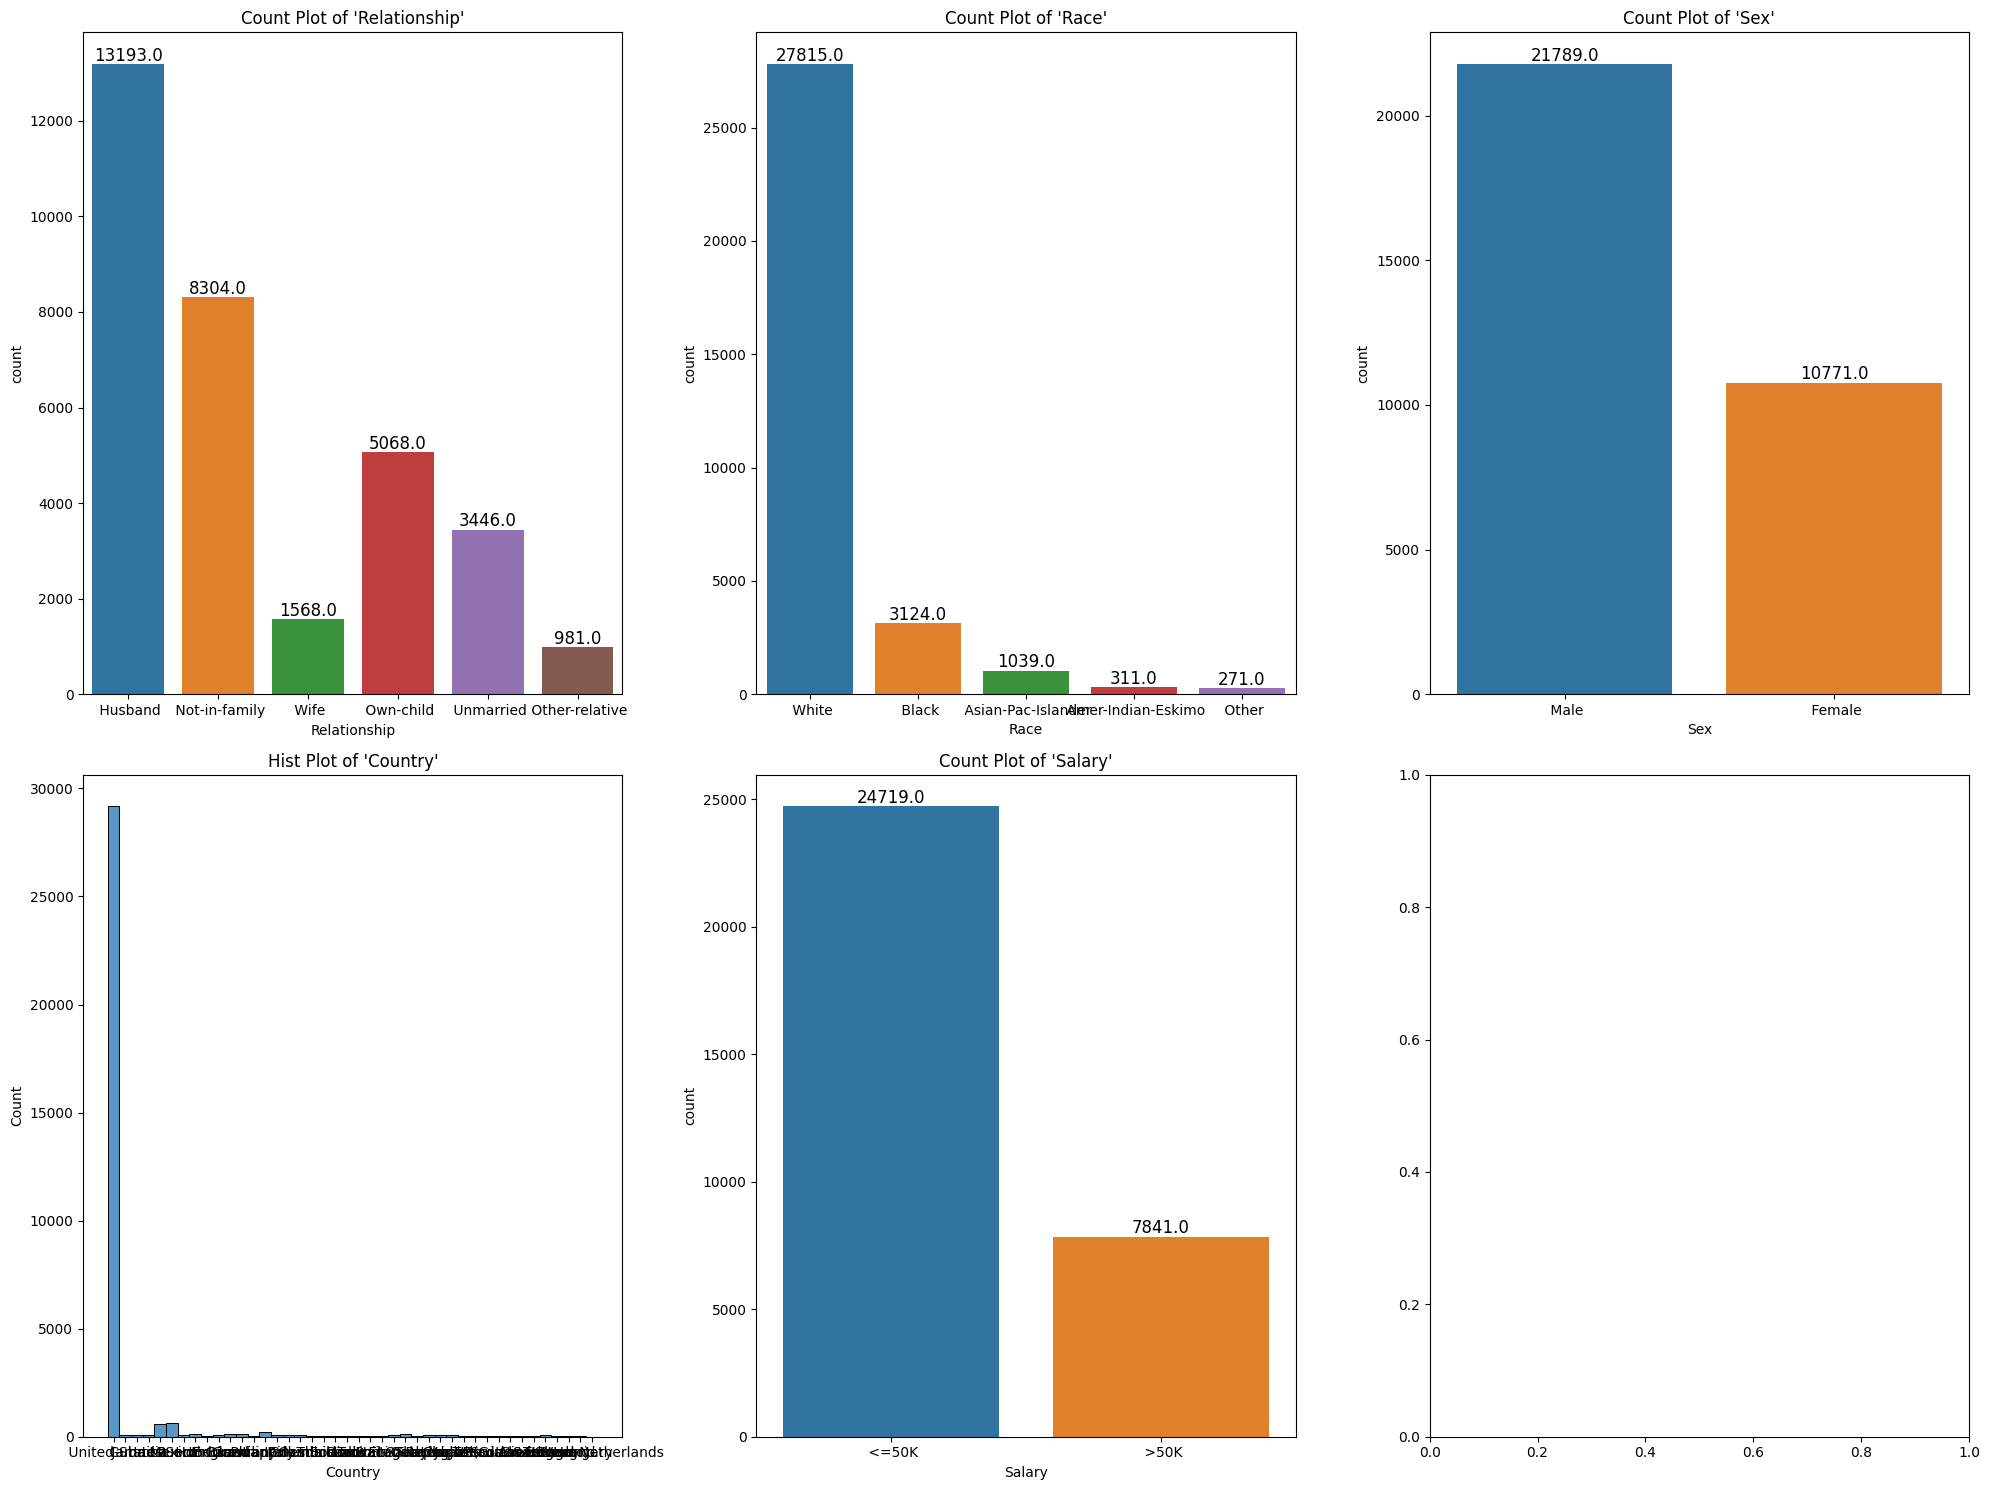

In [16]:
#visualizing the last five categorical features distribution
plot_counts(data=salary_data, features=cat_var[4:], n_rows=2, n_cols=3,figsize=(20,15))

As seen in the countplots, there are some categorical variables with infrequent classes.  If passed
into a model like this,it will increase the dimensionality of the dataset wihout giving useful information for the model.

For example the `Country` dataset has 42 different countries, USA has the highest number of counts (90% of the classes)of all the coutries present in the dataset.

All of the observed columns will be treated by dropping some irrelevant ones and transforming some other columns.





In [40]:
salary_data["Country"].value_counts(normalize=True)

Country
 United-States                 0.895854
 Mexico                        0.019748
 ?                             0.017905
 Philippines                   0.006081
 Germany                       0.004208
 Canada                        0.003716
 Puerto-Rico                   0.003501
 El-Salvador                   0.003256
 India                         0.003071
 Cuba                          0.002918
 England                       0.002764
 Jamaica                       0.002488
 South                         0.002457
 China                         0.002303
 Italy                         0.002242
 Dominican-Republic            0.002150
 Vietnam                       0.002058
 Guatemala                     0.001966
 Japan                         0.001904
 Poland                        0.001843
 Columbia                      0.001812
 Taiwan                        0.001566
 Haiti                         0.001351
 Iran                          0.001321
 Portugal                      0

### 2b. Data Cleaning and Feature Engineering 

#### Transforming the age column through Discretization. 

This discretization will be done by dividing the age column into different age groups. This will help handle the outliers that are present in the dataset `Age` feature

#### Feature Engineering

The categorical variables will be cleaned first. 
Rare Labels: It is neceassary to take care of rare labels in the data also. Any categorical columns with less that 5% of a particular label will be considered as rare and such label will be encoded using Feature engine RareLabelEncoder.

In [73]:
#discretize age

#Young adult (18-25 age), Adult (26-44 age), Middle-age (45-59 age), Old age (60 age))
def discretize_age(x):
    
    if x>=17 and x<=25: #if age is between 18-25
        return "Young_adult"
    elif x>=26 and x<=44: #if age is between 26-44
        return "Adult"
    elif x>=45 and x<=59:  #if age is between 45-59
        return "Middle_age"
    elif x>=60:
        return "Old"       #if age is greater than 60

In [74]:
#use of .apply method on the Age column to apply the function to the values

salary_data["Age"]=salary_data["Age"].apply(discretize_age)
salary_data["Age"].unique()

array(['Middle_age', 'Adult', 'Young_adult', 'Old'], dtype=object)

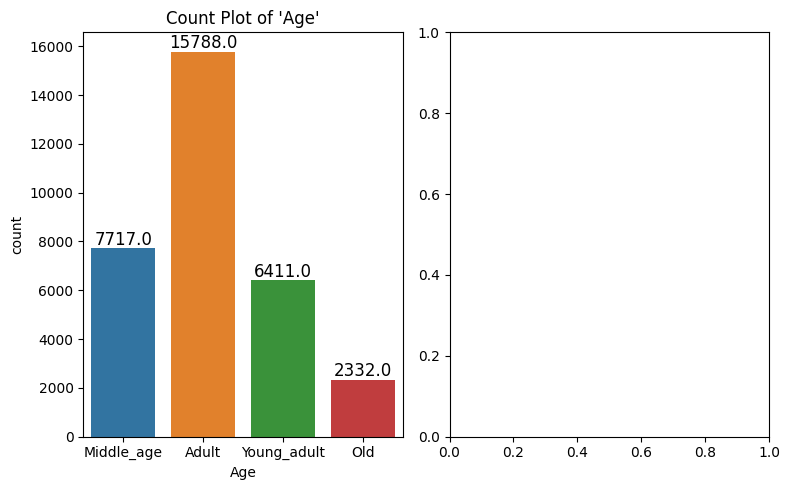

In [67]:
#visualize the distribution of the dataset

plot_counts(data=salary_data, features=["Age"], n_rows=1, n_cols=2, figsize=(8,5))
plt.show()



After discretizing, it is seen that there are more Adults in the "Age" column with old persons being the least in this class, which looks like a typical case for any working class age group. This would help our model have a better understanding of the data rather than numerical representation with a lot of outliers as seen from the boxplot of the numerical represenatation of the Age column 

#### Data cleaning -Dropping Irrelevant columns

In [41]:
#drop irrelevant columns, Education, Capital loss, Capital gain and Country
col_to_drop=["Capital_gain", "Capital_loss", "Education_num"]
salary_data.drop(columns=col_to_drop, axis=1, inplace=True)

#check the shape of the dataset
salary_data.shape

(32560, 12)

### Step 3: Split Dataset into Train and Test set

It is necessary to split the dataset when performing pre-processing such as Encoders, so as to allow the model learn properly from the training set and generalize well on unseen data.

In [155]:
#Split data into train and test sets

#get the features and the target from the dataset
TARGET="Salary"
RANDOM_STATE = 123
TEST_SIZE = 0.2  #split dataset with 20percent of the dataset for testing
#features
X=salary_data.drop(columns=TARGET)
#target
y=salary_data[TARGET]

#split the features into train and test 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE
)

X_train.shape, X_test.shape

((26048, 14), (6512, 14))

In [156]:
#view the first five examples of the X_train data
X_train.head()

,Age,Workclass,Final_weight,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Country
6994,Young_adult,?,168863,Some-college,10,Never-married,?,Own-child,White,Female,0,0,20,United-States
17064,Young_adult,Private,270436,HS-grad,9,Never-married,Other-service,Own-child,White,Male,0,0,40,United-States
18434,Adult,Self-emp-not-inc,405644,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,35,Mexico
3294,Young_adult,Private,51136,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,60,United-States
31316,Young_adult,Private,50953,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,40,United-States


Although this dataset has no missing values but there are some entries that are not relevant in the data, which is "?". This value has to be replaced by Nan first.  
This can be seen in the `Workclass` and `Occupation` variables

In [157]:
print(X_train.Workclass.value_counts(normalize=True))
print("------------------------------------")
X_train.Occupation.value_counts(normalize=True)
#X_train["Race"].value_counts(normalize=True)
#X_train["Marital_status"].value_counts(normalize=True)
#X_train.Relationship.value_counts(normalize=True)


Workclass
 Private             0.698134
 Self-emp-not-inc    0.077856
 Local-gov           0.062922
 ?                   0.056818
 State-gov           0.038851
 Self-emp-inc        0.034436
 Federal-gov         0.030482
 Without-pay         0.000346
 Never-worked        0.000154
Name: proportion, dtype: float64
------------------------------------


Occupation
 Craft-repair         0.126420
 Prof-specialty       0.125960
 Exec-managerial      0.125576
 Adm-clerical         0.115748
 Sales                0.112293
 Other-service        0.101275
 Machine-op-inspct    0.061502
 ?                    0.056972
 Transport-moving     0.049370
 Handlers-cleaners    0.042038
 Farming-fishing      0.030713
 Tech-support         0.027680
 Protective-serv      0.019810
 Priv-house-serv      0.004415
 Armed-Forces         0.000230
Name: proportion, dtype: float64

#### Data cleaning :Replacing invalid entries

In [158]:
#replacing invalid entries with NaN
X_train.replace(" ?", np.NaN,inplace=True)
X_test.replace(" ?", np.NaN,inplace=True)

#checking to see if the ? have been replaced

X_train.isna().sum()/X_train.shape[0]


Age               0.000000
Workclass         0.056818
Final_weight      0.000000
Education         0.000000
Education_num     0.000000
Marital_status    0.000000
Occupation        0.056972
Relationship      0.000000
Race              0.000000
Sex               0.000000
Capital_gain      0.000000
Capital_loss      0.000000
Hours_per_week    0.000000
Country           0.018351
dtype: float64

In [159]:
##Handling the columns with NaN values by filling them with the most frequent category.

columns_with_nan = ['Workclass', 'Occupation', "Country"]
for col in columns_with_nan:      #loop through te columns in the list 
    X_train[col].fillna(X_train[col].mode()[0], inplace=True)   #fill with te mode
    X_test[col].fillna(X_train[col].mode()[0], inplace=True)
    

        
    
X_train.head()  
    

,Age,Workclass,Final_weight,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Country
6994,Young_adult,Private,168863,Some-college,10,Never-married,Craft-repair,Own-child,White,Female,0,0,20,United-States
17064,Young_adult,Private,270436,HS-grad,9,Never-married,Other-service,Own-child,White,Male,0,0,40,United-States
18434,Adult,Self-emp-not-inc,405644,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,35,Mexico
3294,Young_adult,Private,51136,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,60,United-States
31316,Young_adult,Private,50953,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,40,United-States


In [160]:
X_train.isna().sum()/X_train.shape[0]

Age               0.0
Workclass         0.0
Final_weight      0.0
Education         0.0
Education_num     0.0
Marital_status    0.0
Occupation        0.0
Relationship      0.0
Race              0.0
Sex               0.0
Capital_gain      0.0
Capital_loss      0.0
Hours_per_week    0.0
Country           0.0
dtype: float64

In [161]:
X_test.isna().sum()/X_test.shape[0]

Age               0.0
Workclass         0.0
Final_weight      0.0
Education         0.0
Education_num     0.0
Marital_status    0.0
Occupation        0.0
Relationship      0.0
Race              0.0
Sex               0.0
Capital_gain      0.0
Capital_loss      0.0
Hours_per_week    0.0
Country           0.0
dtype: float64

#### Pre processing the target variable

In [162]:
#The datatype of the target variable is an object type and needs to be coverted to a numerical data.

def map_target(target) -> dict :
    """This function converts a object data to a numerical value
        Used for preparing the traget variable for classification models
        
        Params:
            target, pd.DataFrame
        Returns:
            A dict {}
    """

    #lets use 1 for >50k and 0 for  <=50k
    labels=list(target.unique())
    labels_dict={}
    for i, label in enumerate(labels):
        labels_dict[label]=i
        
    return labels_dict
        
    


    
#map the values to the target train and tes set

y_train=y_train.map(map_target(y))
y_test=y_test.map(map_target(y))
y_train

6994     0
17064    0
18434    0
3294     0
31316    0
        ..
28636    0
17730    0
28030    0
15725    1
19966    0
Name: Salary, Length: 26048, dtype: int64

#### Feature Engineering : 
1. Encoding Rare Labels in Categorical data

The plots for the categorical variables shows that some of the  variables have rare labels, Work_class, Marital_status, Country and Place. Rare Label Encoding is the process of grouping labels that show a small percentage of examples in a given dataset into a new category.

This will be handled using RareLabel Encoder

2. One Hot Encoding Categorical data

The process of encoding each categorical variable with a set of boolean variables. This is done before passig a dataset into a model, as the mdoel can only learn from numerical values

3. Normalization
 
This is scaling numerical variable values between 0 ans 1 so as to allow the model apply the weights accordingly to the features.

In [163]:
#replace categories with frequency below 0.05 in the columns with "other" 
#provided that the categorical variable has more than categories
col_with_rare_labels=["Occupation", "Race","Marital_status", "Relationship", "Workclass", "Country"] 

rare_encoder = RareLabelEncoder(tol=0.05, variables=col_with_rare_labels, replace_with="other", n_categories=4) 


#The variables to scale
var_to_scale=X_train.select_dtypes(exclude="O").columns
var_to_enc=X_train.select_dtypes(include="O").columns

var_to_scale
var_to_enc
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26048 entries, 6994 to 19966
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             26048 non-null  object
 1   Workclass       26048 non-null  object
 2   Final_weight    26048 non-null  int64 
 3   Education       26048 non-null  object
 4   Education_num   26048 non-null  int64 
 5   Marital_status  26048 non-null  object
 6   Occupation      26048 non-null  object
 7   Relationship    26048 non-null  object
 8   Race            26048 non-null  object
 9   Sex             26048 non-null  object
 10  Capital_gain    26048 non-null  int64 
 11  Capital_loss    26048 non-null  int64 
 12  Hours_per_week  26048 non-null  int64 
 13  Country         26048 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.0+ MB


In [164]:
X_train=rare_encoder.fit_transform(X_train)
X_test=rare_encoder.transform(X_test)

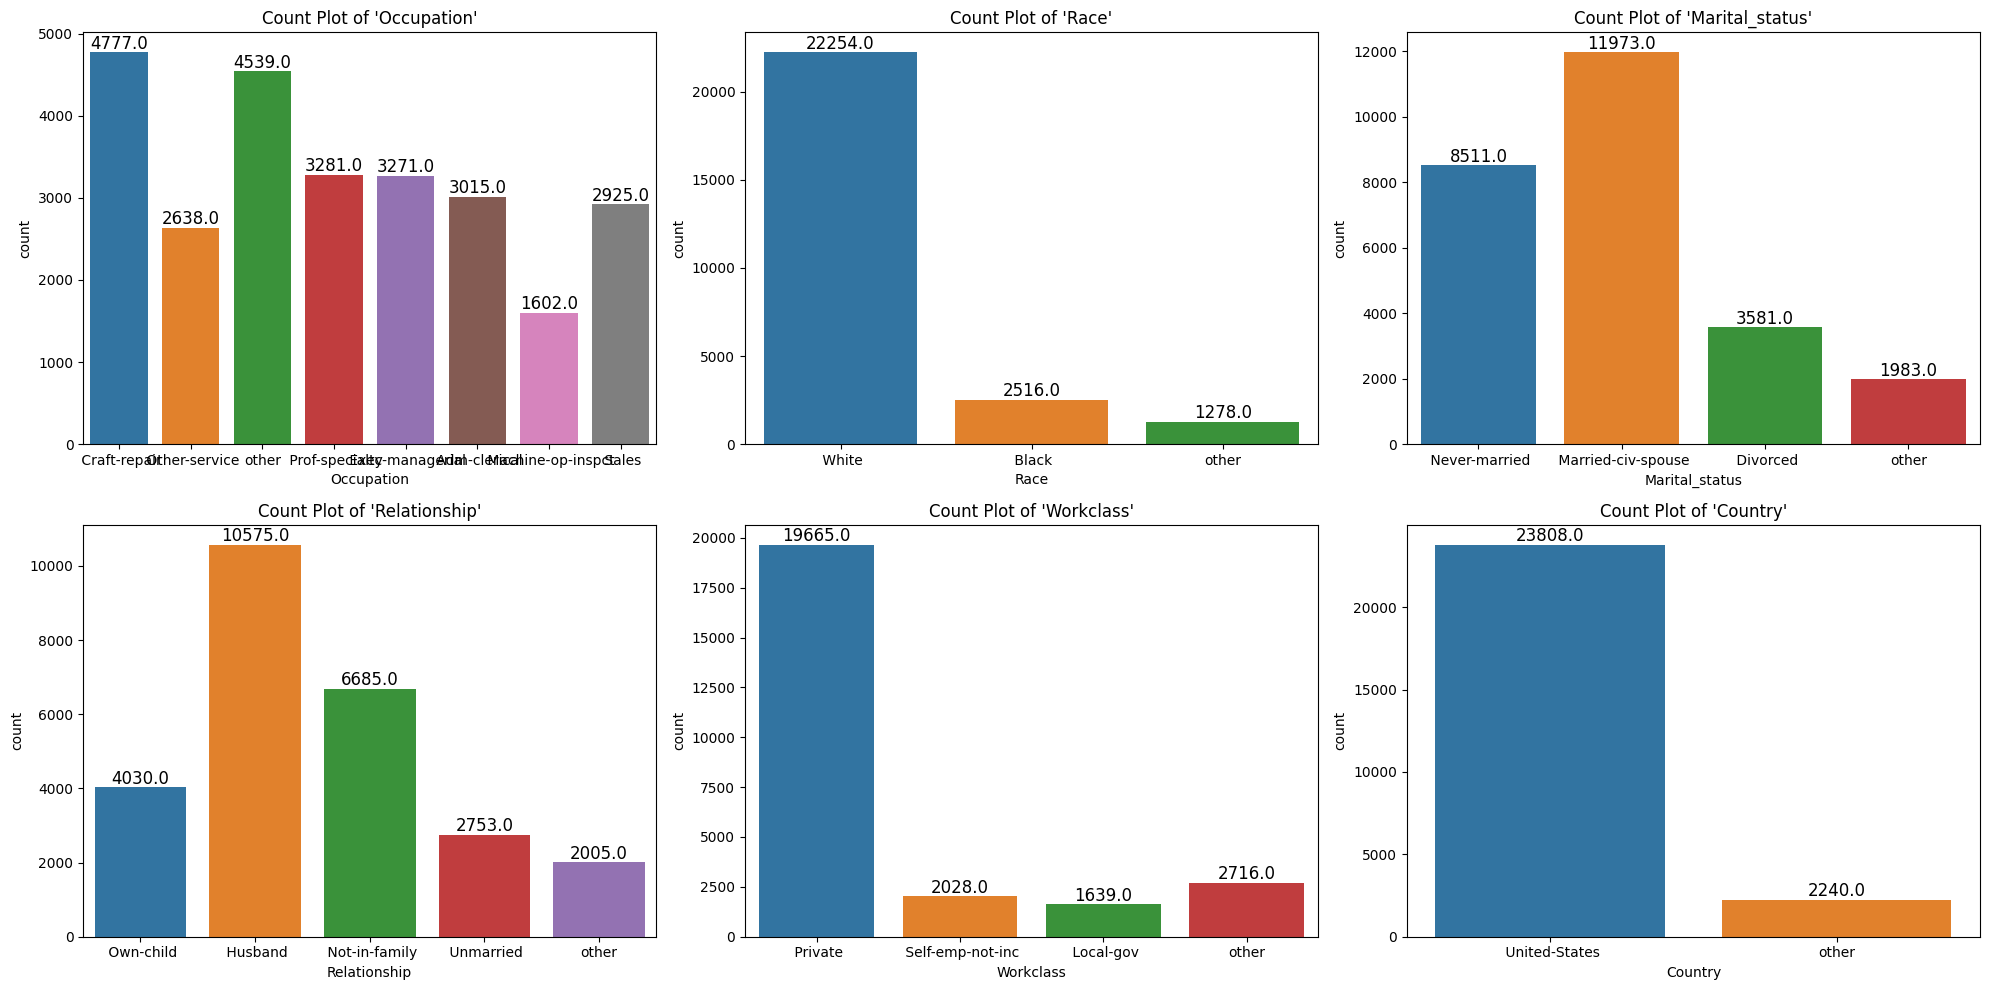

In [128]:
#visualizing the new categories
plot_counts(data=X_train, features=col_with_rare_labels, n_rows=2, n_cols=3, figsize=(20,10))

In [165]:

# ===== OHE =====
ohe = OneHotEncoder(dtype=int, handle_unknown="ignore")

# ===== Scaler =====
scaler = MinMaxScaler()

#column transformer instantiation
col_transformer = ColumnTransformer(
    transformers=[("ohe", ohe, var_to_enc), ("scaler", scaler, var_to_scale)],
    remainder="passthrough",
)

col_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe',
                                 OneHotEncoder(dtype=<class 'int'>,
                                               handle_unknown='ignore'),
                                 Index(['Age', 'Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Country'],
      dtype='object')),
                                ('scaler', MinMaxScaler(),
                                 Index(['Final_weight', 'Education_num', 'Capital_gain', 'Capital_loss',
       'Hours_per_week'],
      dtype='object'))])

In [194]:
X_train_trans=col_transformer.fit_transform(X_train)
X_test_trans=col_transformer.transform(X_test)

In [199]:
X_train_trans.shape, X_train.shape

((26048, 53), (26048, 14))

The transformed dataset has 53 columns.

### 4. Data Modelling 

This is a classification problem as The target is not a continuos value but a discrete values of two classes. Therefore, it is a binary classification.

Common classifers for Binary Classification are 

* Decision Tree Classifier

* Logistic Regression

* Support Vector Machine

* Random Forest

For this problem, Random Forest  will be used.

In [204]:
#initiating the random forest classifier

from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=RANDOM_STATE)

random_forest.fit(X_train_trans, y_train) #fit the training set to the classifier


RandomForestClassifier(random_state=123)

In [205]:
#make predictions on the model
y_pred=random_forest.predict(X_test_trans)

### 5. Evaluating the model performance

Every machine learning model is built so as to predict on unseen data. Every model needs to be evaluated to test approximately how well a model will correctly predict an outcome.

The following Evaluation metrics will be used for evaluating the model

1. Accuracy
2. Confusion Matrix
3. Recall
4. Precision

In [206]:
#accuracy of the model
from sklearn.metrics import accuracy_score

print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.8462837837837838


The model has a prediction of 84%. This means that the model predicted 84 percent of the test data correctly. The target variable is imbalance as observed from the countplots and tjis can be misleading for us as most of the category belongs to one class.



In [212]:
y_test.value_counts()#normalize=True)

Salary
0    4970
1    1542
Name: count, dtype: int64

`76 percent` of the data is from the 0 class, i.e below 50K...We cant not be  sure if the model guessed some of the data because the dataset is immalanced. A confusion matrix can help visualize how the model predictions were made.


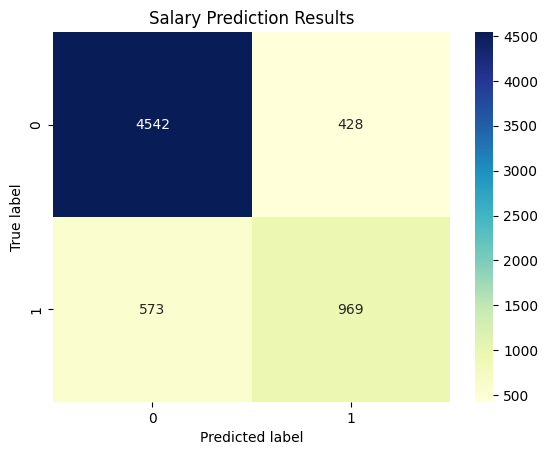

In [217]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)  #instantiate the confusion matrix

plt.style.use('default')
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')  #annotate the heatmap

plt.ylabel('True label')

plt.xlabel('Predicted label')

plt.title('Salary Prediction Results')
plt.show()

From the confusion matrix, the model predicted 4542 out of 4970 `0` class correctly and also 969 out of 1542 `1` class correctly. 

It confused 428 from the `1` class as `0`and  confused 573 from the `1` class as `0`.

N.B==>
`1` is >50k, `0` is <=50K

The percentage of the the confusion matrix is shown below to provide more context on the performance of the model. 

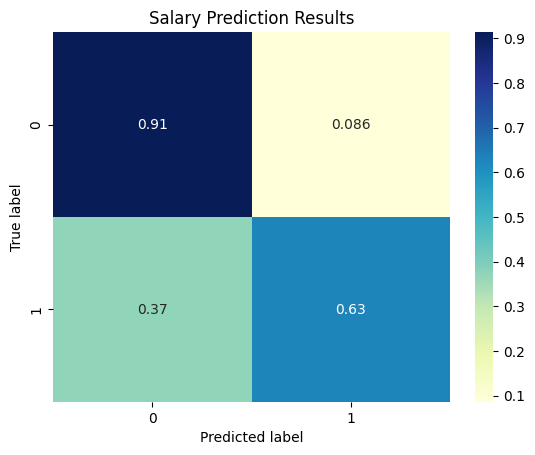

In [220]:
cm_percent= cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] 

plt.style.use('default')
sns.heatmap(cm_percent, annot=True, cmap='YlGnBu')  #annotate the heatmap

plt.ylabel('True label') 

plt.xlabel('Predicted label')

plt.title('Salary Prediction Results')
plt.show()


As we can see, our model correctly predicts 91 percent of people who earn less than 50K and 63 percent of people who do not.

In [ ]:
#3. Recall



In [ ]:
#correlation matric to see correlation between the features

corr=X_train[var_to_scale].corr()
sns.heatmap(data=corr, annot=True)

#transform categorical columns to numerical by one-hot encoding and normalize the data with MinMax scaler to allow equal weights in the dataset

In [ ]:
logit = LogisticRegression(random_state=RANDOM_STATE)

logit.fit(tr, y_train)

y_pred=logit.predict(test)
y_pred.shape

In [ ]:
y_test.shape

In [178]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plt.style.use('default')
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.savefig('heatmap.png')
plt.show()

NameError: name 'y_pred' is not defined

In [153]:
from sklearn.ensemble import RandomForestClassifier
ran_for = RandomForestClassifier(random_state=42)

ran_for.fit(X_tr, y_train)

RandomForestClassifier(random_state=42)

In [175]:
y_pred_ran=ran_for.predict(x_te)

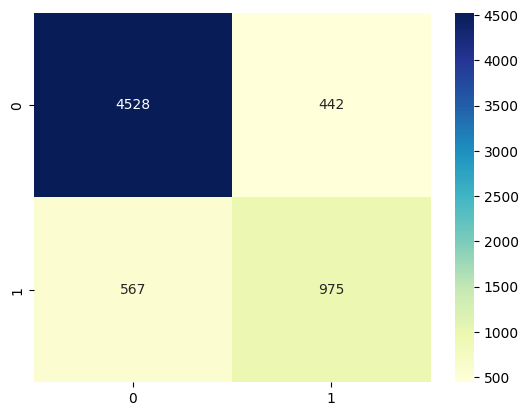

In [179]:
cm = confusion_matrix(y_test, y_pred_ran)
plt.style.use('default')
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.savefig('heatmap.png')
plt.show()

In [181]:
from sklearn.metrics import classification_report


NameError: name 'y_pred' is not defined

In [182]:
print(classification_report(y_test, y_pred_ran))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      4970
           1       0.69      0.63      0.66      1542

    accuracy                           0.85      6512
   macro avg       0.79      0.77      0.78      6512
weighted avg       0.84      0.85      0.84      6512



In [184]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [186]:
knn.fit(X_tr, y_train)

KNeighborsClassifier()

In [187]:
knn_pred=knn.predict(x_te)

In [188]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      4970
           1       0.65      0.57      0.61      1542

    accuracy                           0.83      6512
   macro avg       0.76      0.74      0.75      6512
weighted avg       0.82      0.83      0.82      6512



In [ ]:
# Init
logit = LogisticRegression(random_state=RANDOM_STATE)

pipe_logit = Pipeline(
    steps=[
        # ===== Column Transformer =====
        ("col_transformer", col_transformer),
        # ===== log Model =====
        ("logit", logit),
    ]
)

pipe_logit

In [ ]:
# Fit
pipe_logit.fit(X_train, y_train)



In [ ]:
X_test

#things to do

-randomized search for random forest

-*discretize age (Age group comparison between Young adult (18-25 age), Adult (26-44 age), Middle-age (45-59 age), Old age (60 age))


-use of pipeline

-add picture to 

-update markdown 
 --do univariate and multivariate analysis, correlation map
 --add evaluation
 --edit and submit
 
 practice computer vision

In [ ]:
logit = LogisticRegression(random_state=RANDOM_STATE)

logit.fit(tr, y_train)

y_pred_2=logit.predict(test)
y_pred_2.shape

In [ ]:
print(classification_report(y_test, y_pred_2))

In [ ]:
cm = confusion_matrix(y_test, y_pred_2)
plt.style.use('default')
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.savefig('heatmap.png')
plt.show()

In [189]:
from sklearn.svm import SVC
svc = SVC(random_state=RANDOM_STATE)
svc.fit(X_tr, y_train)

SVC(random_state=123)

In [190]:
y_pred_svc=svc.predict(x_te)

In [191]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4970
           1       0.72      0.57      0.64      1542

    accuracy                           0.85      6512
   macro avg       0.80      0.75      0.77      6512
weighted avg       0.84      0.85      0.84      6512



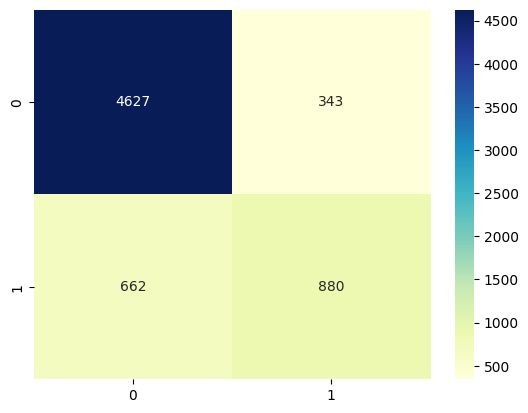

In [192]:
cm = confusion_matrix(y_test, y_pred_svc)
plt.style.use('default')
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.savefig('heatmap.png')
plt.show()